# p.13 Naive Bayes

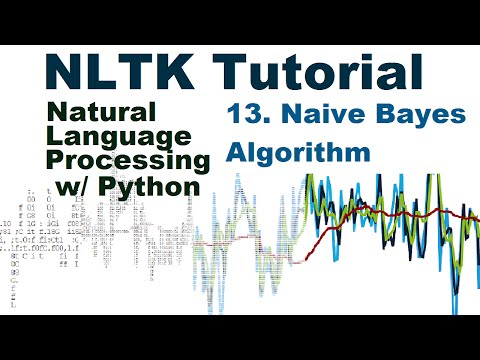

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('rISOsUaTrO4')

## 1. Naive Bayes classifier

(1) It is so simple that it can be used at scale very easily with minimal process requirements.

(2) Has a strong assumption about the independence between ‘features’.

(3) Training set vs. test set

Usually don't overlap, otherwise it will create significant bias.

## 2. Example

In [3]:
import nltk
import random
import string
from nltk.corpus import movie_reviews, stopwords

# Oneliner which is equivalent to 
# documents = []
# for category in movie_reviews.categories():
#     for fileid in movie_reviews.fileids(category):
#         documents.append(list(movie_reviews(fileid)), category)

# Load 2000 movie reviews where 1000 are positive and the other 1000 are negative.
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Add all the words to a single list.
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
    
# Remove the stop words and the punctuations.
stop_words = set(stopwords.words("english"))
stop_words = stop_words.union(set(string.punctuation))
#print("stop_words:\n", stop_words)

filtered_words = [w for w in all_words if w not in stop_words]

# Note that the words in "filtered_words_dist" are NOT sorted in their frequecies.
filtered_words_dist = nltk.FreqDist(filtered_words)

# Restrict our 'features' to the most common 3000 words.
word_features = filtered_words_dist.most_common(3000)
word_features = [wf[0] for wf in word_features]

# Check if each of the most common 3000 words is present in one movie review.
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

# print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

# Label the 'features' in all the movie reviews.
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Partition the entire data set into training set and test set.
training_set = featuresets[:1900]
testing_set = featuresets[1900:]

# Bayes formula: posterior = prior x likelihood / evidence
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)


Naive Bayes Algo accuracy percent: 86.0
Most Informative Features
               ludicrous = True              neg : pos    =     15.7 : 1.0
             outstanding = True              pos : neg    =     10.6 : 1.0
                   mulan = True              pos : neg    =      8.2 : 1.0
            breathtaking = True              pos : neg    =      8.0 : 1.0
                  seagal = True              neg : pos    =      7.9 : 1.0
                  welles = True              neg : pos    =      7.8 : 1.0
                  finest = True              pos : neg    =      7.8 : 1.0
                 idiotic = True              neg : pos    =      7.3 : 1.0
              schumacher = True              neg : pos    =      6.7 : 1.0
             wonderfully = True              pos : neg    =      6.7 : 1.0
                   damon = True              pos : neg    =      6.2 : 1.0
                lebowski = True              pos : neg    =      5.6 : 1.0
                   flynt = True   